# TP 1: Neural networks (1)

## 0. Introduction and preliminaries

## KALMOGO Benjamin

In this practical session, we will explore feedforward neural network architectures for classification. For the implementation of our neural network architectures, we will make use of Tensorflow and Keras. Tensorflow is Google's general machine learning framework, specifically designed for computations involving multi-dimensional arrays, which is particularly useful for neural networks. While the basic tensorflow interface is rather low-level, keras is a high-level library (part of the tensorflow package), that allows us to define neural network architectures in just a few lines of code. Additionally, we'll make use of matplotlib for a visual exploration of the dataset. The code below makes sure the necessary modules are loaded.

In [215]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [216]:
import pandas as pd


## 1. Classifying handwritten digits (classification de chiffres manuscrits) 

In this exercise, we will use the famous MNIST dataset for handwritten digit classification. The dataset contains 70000 instances of handwritten digits (from 0 to 9) – of which 60000 are reserved for training and 10000 for testing.

### Load the MNIST data

 You can load the dataset using the code below.

In [217]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

The data is loaded into four Numpy-arrays:

* `train_images` and `train_labels` contains the data used for training the model
* `test_images` and `test_labels` contains the data used for _evaluating_ the performance of the trained model

The images are 28x28 NumPy arrays (matrices), with pixel values ranging from 0 to 255. The labels are an array of integers – ranging from 0 to 9 – where each number corresponds to the digit represented in the corresponding image.

### Explore the data

In order to get an idea of the kind of data we are working with, we can inspect the Numpy-arrays.

In [218]:
print(train_images.shape)


(60000, 28, 28)


`train_images` is a three-dimensional Numpy-array that contains 60,000 images of 28x28 pixels. The entire training set is thus a stack of 60,000 matries of size 28 by 28. You can inspect the numerical representation of an individual picture as well:



In [219]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As you can see, each pixel is represented by a value between 0 and 255, which is standard for image representations. For each training image, there is a corresponding label in `train_labels`:

In [220]:
print(len(train_labels))
len(train_images)

60000


60000

`test_images` and `test_labels` are structured in the same way. Confirm this by editing the code above.

### Preprocess the data

The code below visualizes the first image of the training set. As you can see, the values range from 0 to 255.

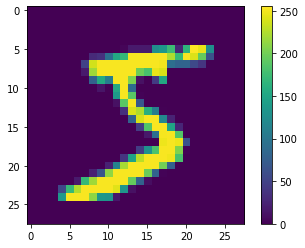

In [221]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In order to efficiently process the data, it is best to normalize the scores to the interval [0,1]. To do so, you can just divide the values by 255. Both the training set and the testing set need to be preprocessed in the same way.

In [222]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In order to verify that the digits were properly normalized, the code below visualizes the first 25 images from the training set, together with the correct label.

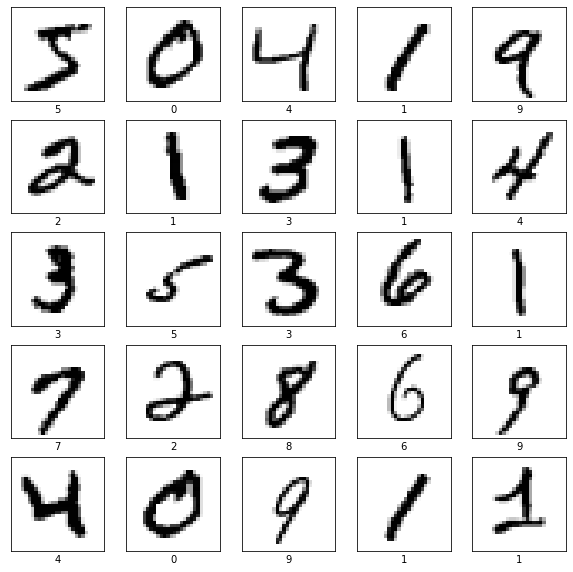

In [223]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

### Build the model

In order to build our neural network architectures, we need to perform two steps. First, we define the structure of the neural network, i.e. the different layers that make up our neural network architecture. Once the structure is defined, we need to compile it so that the data can be efficiently processed.

Using Keras's `Sequential` module, we can just chain together the various layers of our architecture as simple building blocks that make up the entire architecture of the neural network. Under the hood, most of the layers (such as `keras.layers.Dense`) have parameters that are learned during training.

In [224]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28) ),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

The first layer `Flatten` transforms the images from a two-dimensional matrix (28 by 28) into a one-dimensional vector (28 * 28 = 784 values). Instead of using two-dimensional matrices, each image is processed as a one-dimensional vector. This layer has no parameters to learn, it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer (the hidden layer of the neural network) has two neurons: it takes the 784-valued image vector as input, and it outputs a vector of two values. The second (and last) layer is a 10-node softmax layer that takes the 2-valued vector yielded by the previous layer as input, and returns an array of 10 probability scores that sum to 1. Each score represents the probability that the current image belongs to that particular class.

Once the structure of the network has been defined, the next step is to compile it. In order to do so, we need to define a number of additional settings:

* **Loss function**: The loss function measures how accurate the model is during training. Our aim is to minimize the loss, so that we gradually push the model's parameters in the right direction. Our aim is to classify digits, which means *cross-entropy* is a suitable loss function.
* **Optimizer**: The optimizer defines the procedure that we'll use in order to minimize the loss function. The example below makes use of *stochastic gradient descent (sgd)*.
* **Metrics**: Metrics are used to evaluate the performance of our model. We'll make use of *accuracy*, i.e. the fraction of the images that are correctly classified.

In [225]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train model

Once the network architecture is compiled, we are ready to start training our model. In order to train our model, we feed our neural network with the images of the training set, together with their correct labels. The network then learns to associate the images with the correct labels, i.e. the network aims to minimize the mismatch between the predicted labels and the correct labels. It does so by gradually updating the parameters of the network, such that the loss function is minimized.

The function to train the model is called `fit`, because the model's parameters "fitted" to the training data. In order to properly train the network, we usually go through the training data more than once. Each pass over the training set is called an epoch; `epochs=10` means that we'll go through the entire training set 10 times in a row.

In [226]:
model.fit(train_images, train_labels, epochs=10 )

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6455 - accuracy: 0.4086
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0625 - accuracy: 0.6227
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9981 - accuracy: 0.6439
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9543 - accuracy: 0.6612
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9150 - accuracy: 0.6784
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8994 - accuracy: 0.6922
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8755 - accuracy: 0.7009
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8719 - accuracy: 0.7033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8545 - accuracy: 0.7119
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.842

In [227]:
loss_df=pd.DataFrame(model.history.history)

In [228]:
model.history.history

{'accuracy': [0.5116000175476074,
  0.628350019454956,
  0.6474499702453613,
  0.6649666428565979,
  0.6830666661262512,
  0.6921333074569702,
  0.7003999948501587,
  0.7064499855041504,
  0.7115333080291748,
  0.7163500189781189],
 'loss': [1.3689391613006592,
  1.0448635816574097,
  0.9802981615066528,
  0.9445986747741699,
  0.9064762592315674,
  0.8955772519111633,
  0.8817327618598938,
  0.8693037033081055,
  0.8558911085128784,
  0.8478206396102905]}

In [229]:
loss_df

,loss,accuracy
0,1.368939,0.511600
1,1.044864,0.628350
2,0.980298,0.647450
3,0.944599,0.664967
4,0.906476,0.683067
5,0.895577,0.692133
6,0.881733,0.700400
7,0.869304,0.706450
8,0.855891,0.711533
9,0.847821,0.716350


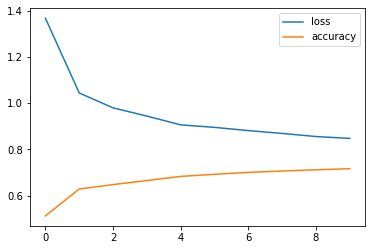

In [230]:
loss_df.plot()

Une dimunition de la loss et une augmentation de la score, qui tente toute vers une valeur stable.

### Evaluate model
Once the model has been trained, you can check how the model performs on the test set. You can use the function `evaluate` for this.

In [231]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3402 - accuracy: 0.9266

Test accuracy: 0.9265999794006348


### Make predictions
Once the model has been trained, you can equally compute the predictions for new images using the function `predict`. Below, we compte the predictions for all the images in the test set. 

In [233]:
predictions = model.predict(test_images)


The model has now computed predictions for each image in the test set. Let's have a look at the predictions for the first image.

In [234]:
predictions[0]

array([1.3998460e-21, 2.9989889e-14, 3.4583942e-07, 3.5911434e-09,
       1.5647406e-15, 1.8221637e-17, 5.1997185e-25, 9.9997747e-01,
       8.3658648e-18, 2.2158307e-05], dtype=float32)

Each prediction consists of a vector of 10 numbers, representing the probability that the image in question belongs to that particular class. You can determine which class has the highest probability by using `argmax`:

In [235]:
np.argmax(predictions[0])

7

So, the model you trained believes that the first image in the test set is most likely a 7. You can now confirm whether this is correct by comparing the result to the correct label in the test set.

In [236]:
test_labels[0]

7

Below, we define a number of functions that allow us to plot a graph of the entire probability vector.

In [237]:
def plot_image(i, predictions_array, true_label, img, class_names=None):
    if class_names == None:
        class_names = range(len(predictions_array))
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


Let's look at the first image of the test set again, together with a graph of the entire probability vector. Correct predictions are in blue, and incorrect predictions are in red.

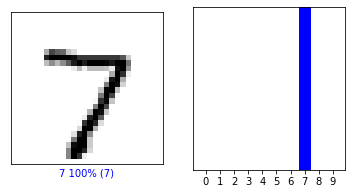

In [238]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


The code below plots the first 15 images of the test set simultaneously. Look at the errors made by the model. Are the errors consistent? Do you understand why the model made the errors? 

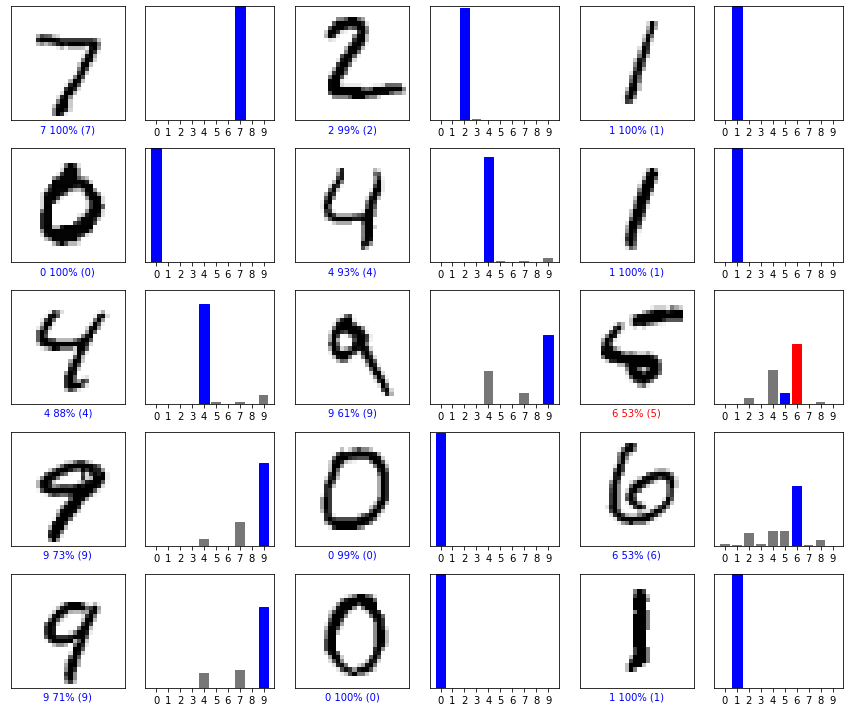

In [239]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



### Exercises
* **Exercise 1**: The model defined above has a singly hidden layer with only two neurons. What is the training accuracy you get? What is the test accuracy? A hidden layer with two neurons is clearly not enough to get good performance. Go back and increase the number of neurons in the hidden layer. How does this change the performance?

**Reponse:** *Le Test accuracy: 0.44620001316070557 et le  Learn accuracy: 0.4499666690826416 .
En augmentant le nombre de neurone a 5 par exemple on a un net amelioration avec score de test et d'apprentissage a 80% et dimunition plus rapide de la loss en 10 epoch.*



* **Exercise 2**: The predefined network uses a sigmoid activation function, but there are other choices. Consult the Keras documentation to find out what other activation functions exist, and try them out. What works best?

**Reponse :** Le meilleur que j'ai obtenu c'est activation='relu' avec un score de Test accuracy: 0.9239000082015991 


* **Exercise 3**: Neural networks often use a regularization procedure called dropout. This means that, for each batch, we randomly set a number of values in a particular layer to 0, so that the neural network cannot always rely on the same neurons for its predictions. Add dropout to the first hidden layer, with a probability rate of 0.5 (which means half of the neurons on average is set to 0).


```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28) ),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
```

avec cette configuratuoin on a une legere baisse du score d'apprentissage.



* **Exercise 4**: As an optimization procedure, the code above uses stochastic gradient descent (with default parameters) as optimizer, but a lot of different optimizers exist. Consult the documentation again and try out different optimizers. What works best?

**Reponse :** D'apres mes essais je trouve optimizer='adam' comme meilleur parametre , les autres diminue le score.

* **Exercise 5**: Add a second hidden layer to the network. How does this influence the performance?



```
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28) ),
    keras.layers.Dense(28, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
```



Avec l'ajout d'une nouvelle couche caher avec 15 neurone on observe un score d'aprentissage accuracy: 0.7206 et une amelioration Test accuracy: 0.915

* **Exercise 6; bonus**: Draw your own digit, and use your neural network architecture to make a prediction. Make sure your image is 28 by 28 pixels. You can either use your favorite drawing program, or you can use the interface available at https://www.pixilart.com/draw. To load your digit, you can use the function `plt.imread`.

In [240]:
## Exercise 6: load your image and use your model to make a prediction

## YOUR CODE HERE
#l'image n'est en 28x28 donc ca cause proble
# digit=plt.imread("pixil-frame-0.png")
# plt.figure(1, figsize=(28, 28))
# plt.imshow(digit, cmap=plt.cm.gray_r, interpolation='nearest')
# plt.show()
# prediction = model.predict(digit)
# prediction=test_labels[0]

In [241]:
digit.shape

(10000, 10000, 4)

## 2. Object recognition (reconnaissance d’objets)

### Load and explore CIFAR10 data

The cifar10 dataset is another famous dataset. It contains 60000 instances of 10
different objects (such as ships and trucks), together with the class labels. Load the dataset using the function below.

In [242]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [243]:
train_images.shape

(50000, 32, 32, 3)

In [244]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

The label data is encoded slightly different. In order to have a single vector of labels, we flatten both label vectors.

In [245]:
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [246]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Each class label is represented as a number from 1 to 10. We therefore define an array of class names, so that image labels are interpretable when we plot them.

In [247]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

The function below plots the first 25 images of the dataset.

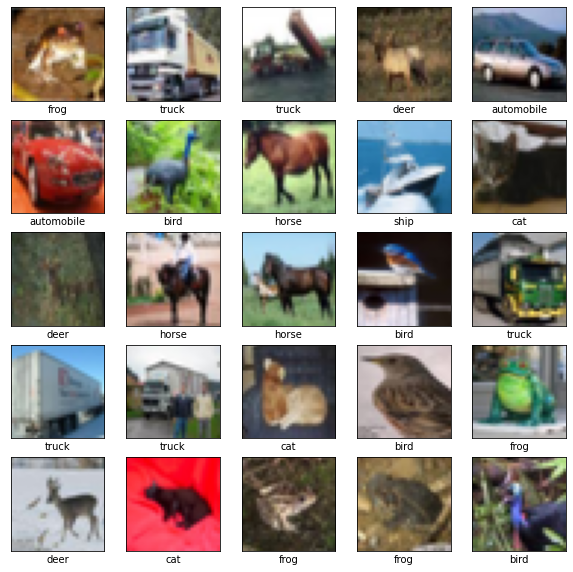

In [248]:
train_labels = train_labels.flatten()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Exercises

* **Exercise 7**: Build an appropriate neural network architecture for object recognition using Keras's `Sequential` module. Compile the model, using an appropriate loss function, optimization procedure, and metric. Train the model on the training set and evaluate it on the test set. What score do you achieve? Try to improve upon your model. You can equally make use of the functions `plot_image` and `plot_value_array` defined above to explore the model predictions for individual images.

In [249]:
## Exercise 7

## YOUR CODE HERE

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32,3) ),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [250]:
model2.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [251]:
model2.fit(train_images, train_labels, epochs=20 )

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1626 - accuracy: 0.1865
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9527 - accuracy: 0.2875
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8987 - accuracy: 0.3075
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8794 - accuracy: 0.3145
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8478 - accuracy: 0.3238
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8236 - accuracy: 0.3408
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8109 - accuracy: 0.3458
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7962 - accuracy: 0.3515
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7828 - accuracy: 0.3599
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.772

In [252]:
loss_df=pd.DataFrame(model2.history.history)

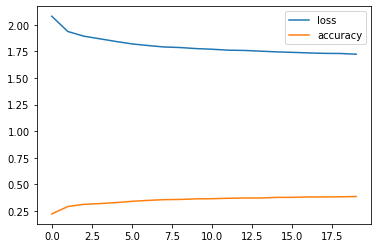

In [253]:
loss_df.plot()

### Evaluate model
Once the model has been trained, you can check how the model performs on the test set. You can use the function `evaluate` for this.

In [254]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.7252 - accuracy: 0.3818

Test accuracy: 0.38179999589920044


### Make predictions


In [255]:
predictions = model2.predict(test_images)


In [256]:
predictions[0]

array([0.09975684, 0.05708983, 0.05792243, 0.30539104, 0.02227875,
       0.11303549, 0.12087438, 0.00127424, 0.21398649, 0.00839054],
      dtype=float32)

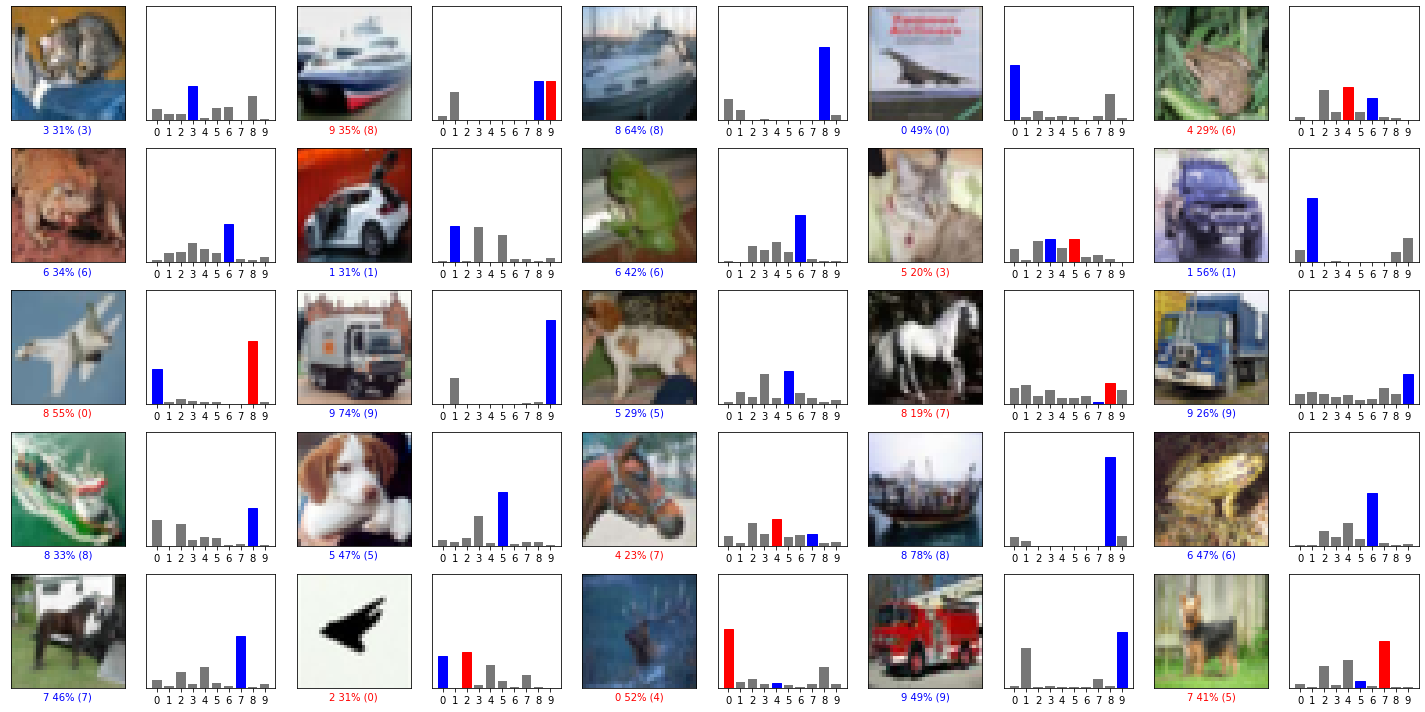

In [257]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


**Reponse:**
On a score de test de 38% qui pourait etre amelorer si augmente le nombre d'epoch.